<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"><h1>Visualization for Science</h1>
<h1>Candlestick chart</h1>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
import yfinance as yf

import tqdm as tq
from tqdm import tqdm

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 2ca189e6e9c9af68fc07169751f33298eef96492

json      : 2.0.9
pandas    : 1.1.3
yfinance  : 0.1.63
tqdm      : 4.62.0
watermark : 2.1.0
matplotlib: 3.3.2
numpy     : 1.19.2



Set the default colors we'll be using

In [3]:
colors = np.array(['#70bf41', '#f9517b'])

# DJIA data

We start by downling the Dow Jones Industrial Average data using the Yahoo! Finance API

In [4]:
data = yf.download("DJI", start="2020-01-01", end="2021-07-31", interval='1mo')

[*********************100%***********************]  1 of 1 completed


We collected data from Jan 1st, 2020 until Jul 31st, 2021 at one month resolution, so we get the values indexed by the first day of the month

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,28634.900391,29348.099609,28256.000000,28256.000000,28256.000000,0
2020-02-01,28399.800781,29551.400391,25409.400391,27960.800781,27960.800781,0
2020-03-01,26703.300781,27090.900391,18591.900391,21917.199219,21917.199219,0
2020-04-01,20943.500000,24633.900391,20943.500000,24345.699219,24345.699219,0
2020-05-01,23723.699219,25548.300781,23248.000000,25383.099609,25383.099609,0


The height of each bar will be given by the difference between the Open and Close values so we compute the difference

In [6]:
data['height'] = data['Open']-data['Close']

And because we want to color the bars by wether the price went up or down, we create another column with the respective color

In [7]:
data['colors'] = colors[(data['Open'] > data['Close']).astype('int')] 

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,height,colors
Date,,,,,,,,
2020-01-01,28634.900391,29348.099609,28256.000000,28256.000000,28256.000000,0,378.900391,#f9517b
2020-02-01,28399.800781,29551.400391,25409.400391,27960.800781,27960.800781,0,439.000000,#f9517b
2020-03-01,26703.300781,27090.900391,18591.900391,21917.199219,21917.199219,0,4786.101562,#f9517b
2020-04-01,20943.500000,24633.900391,20943.500000,24345.699219,24345.699219,0,-3402.199219,#70bf41
2020-05-01,23723.699219,25548.300781,23248.000000,25383.099609,25383.099609,0,-1659.400391,#70bf41


Let's see what our plot looks like so far

<AxesSubplot:xlabel='Date'>

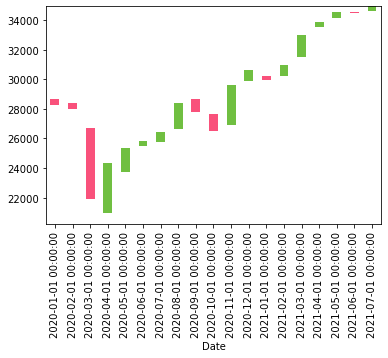

In [9]:
data.plot(kind='bar', # Bar plot
          y='height', # Use the Open/Close difference as the height
          bottom=data['Close'], # Start plotting the bar at the Close value
          color=data['colors'], # Color each bar by whether the value went up or down
          legend=None) # Remove the legend

Not a bad start, but there's still plenty of room for improvement

Since we'll be using a bar plot, we have to manually specify the axis labels to use as the bar plot doesn't play nicely with datetime objects

In [10]:
data.index = (day.strftime('%b')[0] 
                    if day.strftime('%b') != 'Jan' 
                    else day.strftime('%b\n%Y') 
                    for day in data.index)

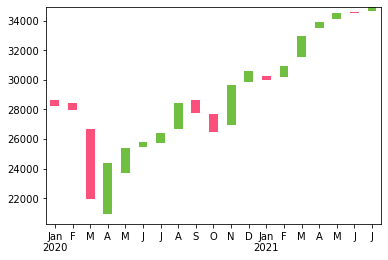

In [11]:
ax = data.plot(kind='bar', y='height', bottom=data['Close'], 
               color=data['colors'], legend=None)

# Set the ticklabels, to undo the default rotation
ax.set_xticklabels(data.index, rotation=0); 

Finally, we add the vertical lines representing the range of values from the heighest to the lowest

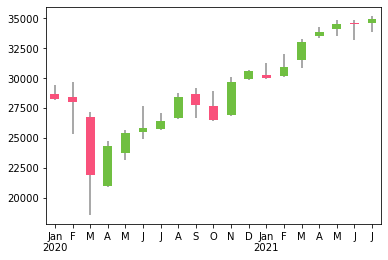

In [12]:
ax = data.plot(kind='bar', y='height', bottom=data['Close'], 
               color=data['colors'], legend=None)

# Add the vertical lines from High to Low
ax.plot([np.arange(data.shape[0]), # x-values
         np.arange(data.shape[0])], 
         data[['High', 'Low']].T.values, # y-values
         color='darkgray', # Color
         zorder=-2, #Plot below the current bars
         lw=2) # Make the lines thicker

# Set the ticklabels, to undo the default rotation
ax.set_xticklabels(data.index, rotation=0); 

And increase figure and fontsizes to make the figure more legible and remove the upper and right side spines to make it sexier

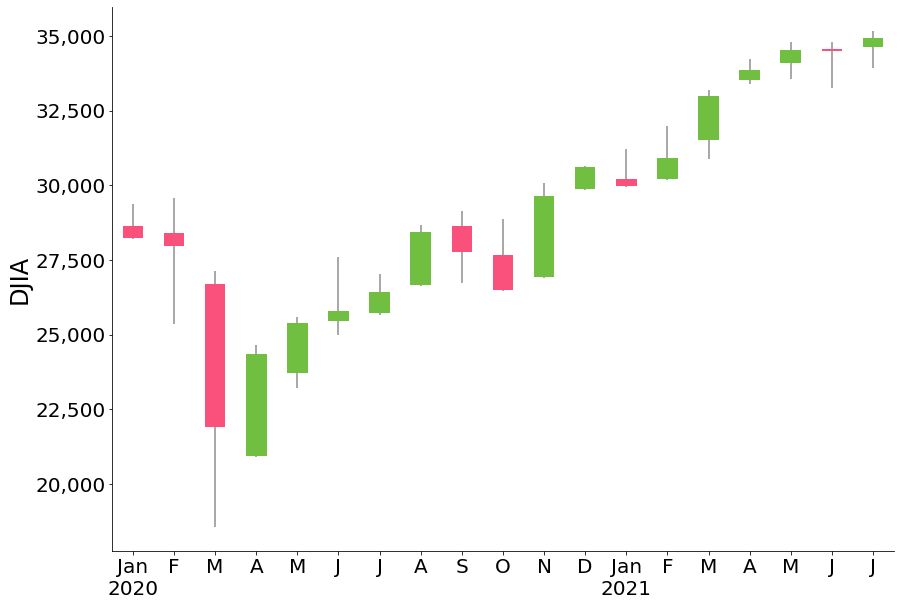

In [13]:
fig, ax = plt.subplots(1, figsize=(14, 10))
data.plot(kind='bar', y='height', bottom=data['Close'], 
               color=data['colors'], legend=None, ax=ax)

# Add the vertical lines from High to Low
ax.plot([np.arange(data.shape[0]), # x-values
         np.arange(data.shape[0])], 
         data[['High', 'Low']].T.values, # y-values
         color='darkgray', # Color
         zorder=-2, #Plot below the current bars
         lw=2) # Make the lines thicker

# Set the correct labels
ax.set_ylabel('DJIA', fontsize=24.0)

# Increase tick mark font size
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Set the ticklabels, to undo the default rotation
ax.set_xticklabels(data.index, rotation=0)

# Add commas to the y-labels
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>